# Searching for Meaning

This notebook considers some strategies for searching for word forms and word meanings, especially using WordNet. It's part of the [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) and assumes that you've already worked through previous notebooks ([Getting Setup](GettingSetup.ipynb), [Getting Started](GettingStarted.ipynb),  [Getting Texts](GettingTexts.ipynb), [Getting NLTK](GettingNltk.ipynb), and [Getting Graphical](GettingGraphical.ipynb)). In this notebook we'll look in particular at

* [matching characters and words](#Matching-Characters-and-Words)
* [stemming and lemmatization](#Stemming-and-Lemmatization)
* [searching for meaning with WordNet](#Searching-for-meaning-with-WordNet)
* [defining functions in Python](#Defining-Functions)

This notebook assumes you've saved a _The Gold Bug_ into a plain text file, as described in [Getting Texts](GettingTexts.ipynb). If that's not the case, you may wish to include the following:

```python
import urllib.request
# retrieve Poe plain text value
poeUrl = "http://www.gutenberg.org/cache/epub/2147/pg2147.txt"
poeString = urllib.request.urlopen(poeUrl).read().decode()```

And then this, in a separate cell so that we don't read repeatedly from Gutenberg:

```python
import os
# isolate The Gold Bug
start = poeString.find("THE GOLD-BUG")
end = poeString.find("FOUR BEASTS IN ONE")
goldBugString = poeString[start:end]
# save the file locally
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)
with open("data/goldBug.txt", "w") as f:
    f.write(goldBugString)```

## Matching Characters and Words

Let's begin by importing _The Gold Bug_ text and creating token lists that we can use subsequently.

In [34]:
# read Gold Bug plain text into string
with open("data/goldBug.txt", "r") as f:
    goldBugString = f.read()

In [65]:
import nltk
goldBugTokens = nltk.word_tokenize(goldBugString)
goldBugWordTokens = [word for word in goldBugTokens if word[0].isalpha()]
goldBugWordTokensLowercase = [word.lower() for word in goldBugWordTokens]

Looks can be deceiving, and it's easy to miss things when you're looking for them. This is as true for humans as for computers, though of course for very different reasons. Humans are easily distracted and error-prone (try counting the number of "t" characters in this paragraph, for instance), whereas computers can be frustratingly literal when searching. We saw this previously when we searched for terms in a case-sensitive way.

In [36]:
print("Number of lowercase matches: ", goldBugString.count("bug"))
print("Number of upper-case matches: ", goldBugString.count("BUG"))
print("Number of converted lower-case matches: ", goldBugString.lower().count("bug"))

Number of lowercase matches:  37
Number of upper-case matches:  1
Number of converted lower-case matches:  38


(BTW, if you did count the "t" characters in the previous text cell, did you count 24? Did you could the capital T or did you decide not to?)

It's worth emphasizing that our previous ```count()``` functions were operating on a string, so the counting matches any sequence of characters in the string, not just whole words. This means that we may actually be catching more than we intend to (which could be good or bad). Let's demonstrate this with another string count:

In [37]:
testBugSentence = "These bugs are bugging me said the bug."
testBugSentence.count("bug")

3

It may be surprising at first to see 3 occurrences of "bug" in our sentence, but of course that's the case:

> _These <span style="color: red">bug</span>s are <span style="color: red">bug</span>ging me said the <span style="color: red">bug</span>._

A common way to differentiate between string characters and entire word tokens is to use regular expressions, but we'll cover regular expressions in a subsequent notebook. For now, to avoid charges of being coy and to provide a preview of how regular expressions work, let's give two quick examples that we won't fully explain here.

In [38]:
import re
# \w matches a word character, \w* means match zero, one or more word characters
bugMatches = re.compile("bug\w*", re.IGNORECASE).findall(goldBugString)
print("Number of matches ", len(bugMatches))
print("Variant forms: ", set(bugMatches)) # set removes duplicates

Number of matches  38
Variant forms:  {'bug', 'BUG', 'bugs'}


However, even without regular expressions, we can list the words that match bug by operating on the word tokens. To accomplish this we'll use the ```in``` operator that allows us to ask if one string is contained in another. This is a variant of the list comprehension syntax we've already seen.

In [39]:
bugTokens = [word for word in goldBugWordTokens if "bug" in word.lower()]
print("Number of matches ", len(bugTokens))
print("Variant forms: ", set(bugTokens))

Number of matches  38
Variant forms:  {'bug', 'goole-bugs', 'goole-bug', 'GOLD-BUG'}


Note that we have the same counts for regular expressions and for our matching of tokens (which is reassuring), though this most recent strategy also shows examples of hyphenated words (the "bug" part of the hyphenated words are also matched by the regular expressions, but our search expression doesn't capture the full token).

## Stemming and Lemmatization

Rather than matching string variants, another approach is to normalize or regularize string forms before they're matched (converting a string to lowercase is actually a simple example of normalization). One very common technique is called stemming, where we ask the computer to follow a set of rules to reduce words to a common root (even if that root isn't necessarily a real word). We won't use stemming much here, but it's useful to see an example of how stemming can work.

In [40]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print("bug: ", stemmer.stem("bug")) # bug
print("bugs: ", stemmer.stem("bugs")) # bug
print("bugging: ", stemmer.stem("bugging")) # bug
print("baking: ", stemmer.stem("baking")) # bake
print("bakery: ", stemmer.stem("bakery")) # bakeri
print("bakeries: ", stemmer.stem("bakeries")) # bakeri

bug:  bug
bugs:  bug
bugging:  bug
baking:  bake
bakery:  bakeri
bakeries:  bakeri


As we can see, our mileage varies. Stemming is good at reducing "bug", "bugs" and "bugging" to "bug", as well as "baking" to "bake", but "bakery" and "bakeries" become the non-existent stem "bakeri". However, in many cases stemming can be very useful, even when it produces stems that aren't real words. Search engines typically do stemming since the non-words are never really shown to the user.

Another approach is to try to lemmatize words, which essentially tries to reduce words to other existing words (not just a stem). How exactly this is done depends on the lemmatizer used, but one useful lemmatizer is WordNet. Let's compare results with the stemmer above.

In [41]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print("bug: ", wnl.lemmatize("bug")) # bug
print("bugs: ", wnl.lemmatize("bugs")) # bug
print("bugging: ", wnl.lemmatize("bugging")) # bugging
print("baking: ", wnl.lemmatize("baking")) # baking
print("bakery: ", wnl.lemmatize("bakery")) # bakery
print("bakeries: ", wnl.lemmatize("bakeries")) # bakery

bug:  bug
bugs:  bug
bugging:  bugging
baking:  baking
bakery:  bakery
bakeries:  bakery


There's clearly a trade-off between the more agressive (and faster) stemming from the previous example and the more conservative lemmatization example above. It's not quite fair to say that WordNet is less powerful (because more words seem to be left unchanged), but it _is_ more conservative – if there's any doubt about the lemma (the lemmatize form), then no change is made. Doubt is often introduced because it's not quite clear if the word form should be a verb, a noun or some other part of speech. Is the word "duck" a bird or the action out the way of something?

Let's see what happens when we provide the part-of-speech (pos) tag for baking:

In [42]:
print("baking: ", wnl.lemmatize("baking")) # baking
print("baking: ", wnl.lemmatize("baking", pos="v")) # bake

baking:  baking
baking:  bake


More sophisticated lemmatizers will guess at the part-of-speech based on the structure of sentences – _I <span style='color: green'>read</span>_ (verb) vs. _a good <span style='color: green'>read</span>_ (noun) –  but for the sake of simplicity and expediency, we'll just ask NLTK to use WordNet to lemmatize each word out of its linguistic context (which essentially helps in making most plural forms into singular forms, like with "bug" and "bugs").

In [43]:
goldBugLemmas = [wnl.lemmatize(word) for word in goldBugWordTokens]
print('Count of "bug" in tokens', goldBugWordTokens.count("bug"))
print('Count of "bugs" in tokens', goldBugWordTokens.count("bugs"))
print('Count of "bug" in lemmas', goldBugLemmas.count("bug"))
print('Count of "eye" in tokens', goldBugWordTokens.count("eye"))
print('Count of "eyes" in tokens', goldBugWordTokens.count("eyes"))
print('Count of "eye" in lemmas', goldBugLemmas.count("eye"))

Count of "bug" in tokens 32
Count of "bugs" in tokens 0
Count of "bug" in lemmas 32
Count of "eye" in tokens 20
Count of "eyes" in tokens 8
Count of "eye" in lemmas 28


So our lemmatization doesn't make much difference for the word _bug_ but it does make a difference for _eye_, which combines _eye_ and _eyes_. The dispersion plots for "eye" tokens will be different than for "eye" lemmas – for instance, the eye lemmas are more visible in the first part of the story.

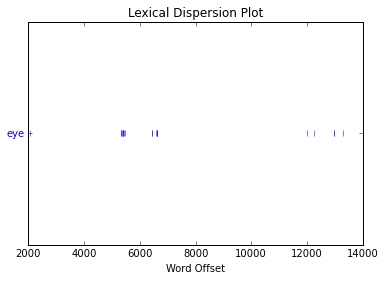

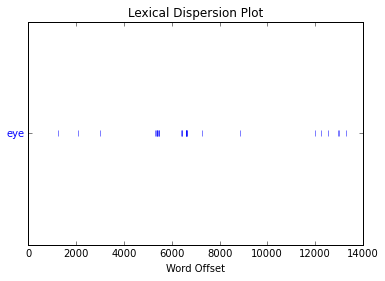

In [44]:
%matplotlib inline
nltk.Text(goldBugWordTokens).dispersion_plot(["eye"]) # first graph with tokens (eye)
nltk.Text(goldBugLemmas).dispersion_plot(["eye"]) # second graph with lemmas (eye and eyes)

We've looked at converting to lowercase, stemming, and lemmatization as ways of helping to ensure that we're matching a greater number of relevant words. Another tool in our NLTK toolbox is to use the semantic features of WordNet to explore words with related meanings.

## Searching for meaning with WordNet

WordNet can be thought of as a large dictionary that allows us to explore the interconnectedness of lexical word forms and their meanings. Entries are organized into sets of cognitive synonyms, called synsets. For instance, we can ask wordnet for synsets for the word "bug":

In [45]:
from nltk.corpus import wordnet as wn
wn.synsets("bug")

[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01'),
 Synset('tease.v.01'),
 Synset('wiretap.v.01')]

The results is a list (the square brackets) composed of elements (separated by commas) that represent Synset objects. We'll look more closely at Synset objects as we go along, but already we can see a structure that resembles a dictionary, with parts of speech ("n" for noun, "v" for verb) and multiple meanings:

* bug.n.01
* bug.n.02
* bug.n.03
* hemipterous_insect.n.01
* microbe.n.01
* tease.v.01
* wiretap.v.01

In our _Gold Bug_ story we're especially interested in the noun bug, not the verb meanings (like to tease or to wiretap)". We can reduce the number of synsets by specifying a part of speech:

In [46]:
wn.synsets("bug", pos="n")

[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01')]

We can maybe reduce our list further by looking more closely at the definitions for each synset.

In [47]:
for synset in wn.synsets("bug", pos="n"):
    print(synset.name(), ": ", synset.definition())

bug.n.01 :  general term for any insect or similar creeping or crawling invertebrate
bug.n.02 :  a fault or defect in a computer program, system, or machine
bug.n.03 :  a small hidden microphone; for listening secretly
hemipterous_insect.n.01 :  insects with sucking mouthparts and forewings thickened and leathery at the base; usually show incomplete metamorphosis
microbe.n.01 :  a minute life form (especially a disease-causing bacterium); the term is not in technical use


Again, given our knowledge of the Poe's short story (though of course we won't always have this familiarity with text we wish to analyze), we can narrow in on the one synset of interest.

In [48]:
bugSynset = wn.synset("bug.n.01")
print(bugSynset, bugSynset.definition())

Synset('bug.n.01') general term for any insect or similar creeping or crawling invertebrate


WordNet's real strength is in exploring words with related meanings. There are several kinds of relationships, but here are some of the main ones:

* synonyms: words with very similar meanings
* hypernyms: words with more general meanings ("insect" is more general than "bug")
* hyponyms: words with more specific meanings ("scarabaeus is more specific than "bug")

In looking for words related to "bug" one possibility might be to look for a more general word and then to collect all of the more specific words that are related. In other words, we look for the hypernym of bug and then we look for all hyponyms of that word. Let's start by looking for hypernyms.

In [49]:
bugSynset.hypernyms()

[Synset('insect.n.01')]

We see that there's only one hypernym for our bug synset, so let's create a variable for that synset.

In [50]:
bugHypernym = wn.synset("insect.n.01")
print(bugHypernym, bugHypernym.definition())

Synset('insect.n.01') small air-breathing arthropod


We've gone up a level in generality from "bug" to "insect" now we want to go down by asking the hyponyms (more specific meanings) of insect.

In [51]:
bugHypernym.hyponyms()

[Synset('beetle.n.01'),
 Synset('bird_louse.n.01'),
 Synset('bug.n.01'),
 Synset('collembolan.n.01'),
 Synset('defoliator.n.01'),
 Synset('dictyopterous_insect.n.01'),
 Synset('dipterous_insect.n.01'),
 Synset('earwig.n.01'),
 Synset('ephemerid.n.01'),
 Synset('ephemeron.n.01'),
 Synset('flea.n.01'),
 Synset('gallfly.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('heteropterous_insect.n.01'),
 Synset('holometabola.n.01'),
 Synset('homopterous_insect.n.01'),
 Synset('hymenopterous_insect.n.01'),
 Synset('imago.n.02'),
 Synset('leaf_miner.n.01'),
 Synset('lepidopterous_insect.n.01'),
 Synset('louse.n.01'),
 Synset('mecopteran.n.01'),
 Synset('neuropteron.n.01'),
 Synset('odonate.n.01'),
 Synset('orthopterous_insect.n.01'),
 Synset('phasmid.n.01'),
 Synset('pollinator.n.01'),
 Synset('proturan.n.01'),
 Synset('psocopterous_insect.n.01'),
 Synset('pupa.n.01'),
 Synset('queen.n.01'),
 Synset('social_insect.n.01'),
 Synset('stonefly.n.01'),
 Synset('termite.n.01'),
 Synset('thysanopter.

That's quite a list of critters. We can see "beetle.n.01", "bug.n.01" and many other synsets, but the problem is that we also want to list the hyponyms of these hyponyms, and the hyponyms of those hyponyms, etc., until no further hyponyms are found. In programming this is called a recursive function and can be accomplished in several ways.

One very succinct and a bit tricky way of achieving this in Python would look something like this:

In [52]:
insectHyponymsTricky = sorted(set([l.name() for s in bugHypernym.closure(lambda s:s.hyponyms()) for l in s.lemmas()]))
print(insectHyponymsTricky[-50:]) # peek at last 50

['tusser', 'tussock_moth', 'tussore', 'tussur', 'two-spotted_ladybug', 'two-winged_insects', 'tzetze', 'tzetze_fly', 'underwing', 'vedalia', 'velvet_ant', 'vespid', 'vespid_wasp', 'viceroy', 'vinegar_fly', 'walking_leaf', 'walking_stick', 'walkingstick', 'warble_fly', 'wasp', 'water_beetle', 'water_boatman', 'water_bug', 'water_scorpion', 'water_skater', 'water_strider', 'wax_insect', 'wax_moth', 'web_spinner', 'webbing_clothes_moth', 'webbing_moth', 'webworm_moth', 'weevil', 'wheel_bug', 'whirligig_beetle', 'white-faced_hornet', 'white_admiral', 'white_ant', 'whitefly', 'wood_ant', 'woolly_adelgid', 'woolly_alder_aphid', 'woolly_aphid', 'woolly_apple_aphid', 'woolly_plant_louse', 'worker', 'worker_bee', 'yellow-fever_mosquito', 'yellow_hornet', 'yellow_jacket']


Yikes, that looks a bit scary, with the [closure](http://www.shutupandship.com/2012/01/python-closures-explained.html), [lambda function](https://docs.python.org/2/reference/expressions.html#lambda), and multiple ```for``` structures. We're going to take a different approach by introducing the concept of defining our own function.

## Defining Functions

To define a function in Python you use the keyword ```def``` that receives usually receives arguments and returns a value. Here's a simplified example:

```python
def add_five(val):
    return val+5 # add 5 to the value and return it

add_five(0) # returns 5
add_five(5) # returns 10```

Now imagine that we keep adding 5 until we get to twenty:

```python
def add_five_until_twenty(val):
    val+=5
    if val >= 20: # we have at least 20, so return
        return val
    else: # call this function again
        return add_five_until_twenty(val)

print(add_five_until_twenty(0)) # returns 20```

We will do something similar for finding hyponyms, as per below. Note that we're not returning a value in the function below, but rather, we're accumulating elements in a list that gets passed as an argument to the function. This is a bit less elegant than some other solutions, but it allows our list of hyponym names to remain as a flat, one dimensional list (instead of having nested lists that we would then need to flatten).

In [53]:
def collect_hyponym_lemma_names(synset, hyponynm_names):
    for hyponym in synset.hyponyms(): # go through this synset's hyponyms
        for lemma in hyponym.lemmas(): # go through each hyponym's lemma
            hyponynm_names.append(lemma.name()) # add this lemma name to our list
        collect_hyponym_lemma_names(hyponym, hyponynm_names) # this this hyponym's hyponyms

In [54]:
insect_hyponym_names = [] # this list will keep track of our hyponynms
collect_hyponym_lemma_names(bugHypernym, insect_hyponym_names) # call our function with the bugHypernym
insect_hyponym_names = sorted(set(insect_hyponym_names))
print(insect_hyponym_names[-50:])

['tusser', 'tussock_moth', 'tussore', 'tussur', 'two-spotted_ladybug', 'two-winged_insects', 'tzetze', 'tzetze_fly', 'underwing', 'vedalia', 'velvet_ant', 'vespid', 'vespid_wasp', 'viceroy', 'vinegar_fly', 'walking_leaf', 'walking_stick', 'walkingstick', 'warble_fly', 'wasp', 'water_beetle', 'water_boatman', 'water_bug', 'water_scorpion', 'water_skater', 'water_strider', 'wax_insect', 'wax_moth', 'web_spinner', 'webbing_clothes_moth', 'webbing_moth', 'webworm_moth', 'weevil', 'wheel_bug', 'whirligig_beetle', 'white-faced_hornet', 'white_admiral', 'white_ant', 'whitefly', 'wood_ant', 'woolly_adelgid', 'woolly_alder_aphid', 'woolly_aphid', 'woolly_apple_aphid', 'woolly_plant_louse', 'worker', 'worker_bee', 'yellow-fever_mosquito', 'yellow_hornet', 'yellow_jacket']


Let's make this functionality even more convenient by defining a new function that takes a single synset and returns a list of hyponym names from the synset's hypernym. Functions are there to be defined in order to have reusable code organized into small units.

In [55]:
def get_hyponym_names_from_hypernym(synset):
    names = []
    for hypernym in synset.hypernyms():
        collect_hyponym_lemma_names(hypernym, names)
    return sorted(set(names))

## Bug Hunting

Let's use our shiny new function to get all the lemmas that are hyponyms of the hypernym ("insect") of our bug synset. This is the same list as we had above, but demonstrates the retrieval of a word list from a synset in one fell swoop.

In [56]:
bug_hypernym_hyponyms = get_hyponym_names_from_hypernym(bugSynset)
print(bugSynset, "has", len(bug_hypernym_hyponyms), "hyponyms")

Synset('bug.n.01') has 886 hyponyms


How many of our _Gold Bug_ tokens are in our insect word list? Easy.

In [57]:
bugRelatedWords = list(set([word for word in goldBugLemmas if word in bug_hypernym_hyponyms]))
bugRelatedWords

['bee', 'bug', 'beetle', 'scarabaeus', 'soldier']

Nice! We used WordNet to find words related to bugs (of the insect persuasion). The only word that may not fit is "soldier", let's have a look.

In [58]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("soldier", 100)

Displaying 1 of 1 matches:
 looking dis here way wid he head down and he soldier up and a white a a gose And den he keep a syp


There's one match, and it's not all that easy to decipher, but "solider" here seems to be a verb and have little to do with bugs. So we can remove it.

In [59]:
bugRelatedWordsFiltered = [word for word in bugRelatedWords if "soldier" not in word]
bugRelatedWordsFiltered

['bee', 'bug', 'beetle', 'scarabaeus']

At the simplest level, we can use our bug list to create a new dispersion plot.

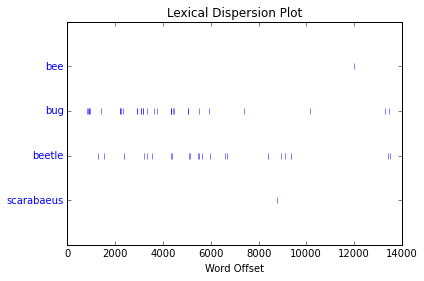

In [60]:
goldBugText.dispersion_plot(bugRelatedWordsFiltered)

We can also do our own kind of lemmatization to group identify all occurrences of our bug words as the same.

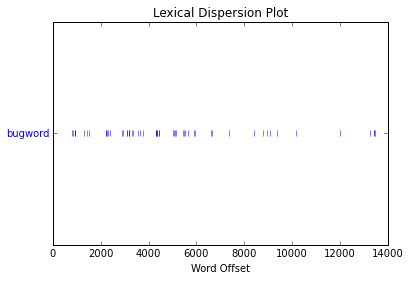

In [61]:
goldBugLemmasForBugs = ["bugword" if word in bugRelatedWordsFiltered else word for word in goldBugLemmas]
goldBugTextForBugs = nltk.Text(goldBugLemmasForBugs)
goldBugTextForBugs.dispersion_plot(["bugword"]) # this plots a composition of bee, scarabaeus, bug and beetle

In [62]:
print(goldBugLemmasForBugs.count("bugword"),goldBugTokens.count("bug"))
goldBugLemmasForBugs.count("bugword") * 100 / goldBugTokens.count("bug")

56 32


175.0

Now that we have a larger and more semantically-robust net for catching our "bug" words, we might also be interested in seeing which other words occur in proximity to our bug words. This is like if we generated a concordance of our bug words and then counted all of the (non stopword) words that were left. Sometimes these are called collocates (co-located terms). An NLTK Text object has a very convenient [similar()](http://www.nltk.org/api/nltk.html?highlight=similar#nltk.text.Text.similar) function for generating a list of the words that occur most often near another word.

In [63]:
goldBugTextForBugs.similar("bugword")

scarabæus tree skull parchment whole insect peg boat island hut spade
hotel treasure pit scrap solution word hearth slip half


That's convenient, but we don't get any frequency information, and with such a small corpus (one short story), it's probably not all that helpful.

If we really want frequency information we can use a [ContextIndex](http://www.nltk.org/api/nltk.html?highlight=similar#nltk.text.ContextIndex) object, which in many ways is similar to a Text object. ```ContextIndex``` has a [word_similarity_dict()](http://www.nltk.org/api/nltk.html?highlight=similar#nltk.text.ContextIndex.word_similarity_dict) function that calculates a frequency value for _every_ word in the document, even ones that don't occur in the context (it's not a raw frequency count, but it will serve our purposes).

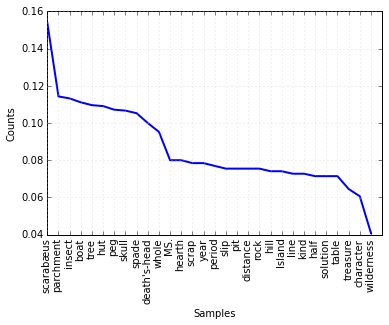

In [64]:
goldBugBugContextIndex = nltk.text.ContextIndex(goldBugLemmasForBugs)
goldBugBugSimilarities = goldBugBugContextIndex.word_similarity_dict("bugword")
del goldBugBugSimilarities['bugword'] # we don't want to include "bugword" itself in our dictionary
goldBugBugSimilarityFreqs = nltk.FreqDist(goldBugBugSimilarities) # copy the dictionary into a FreqDist
goldBugBugSimilarityFreqs.plot(30)

It's not clear that this really helps to provide any insights into the text, not least because bug words are so evenly distributed throughout. Still, the primary purpose of this notebook was to explore how we could search and count more flexibly and powerfully using a mix of strategies ranging from lexical transformations such as case changes, stemming and lemmatization, to word sense lookups with WordNet.

## Next Steps

Here are some tasks to try:

* What's the count of "bug" in our ```goldBugWordTokens``` list and of "bugword" in our ```goldBugLemmasForBugs``` list?
* What's the percentage increase in coverage that we get by lemmatizing and looking related words using WordNet?
* What's another word in _The Gold Bug_ where the percentage increase is greater using the same process we followed:
    * choose a word and find the synset that is most relevant to the text's meaning
    * create a list of all the hyponyms of the hypernym of the synset (using our ```get_hyponym_names_from_hypernym``` function)
    * replace all occurrences of the hyponyms with a standard word form (we used "bugword" last time)

In the next notebook we'll look at [Parts of Speech](PartsOfSpeech.ipynb).

---
[CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/) From [The Art of Literary Text Analysis](ArtOfLiteraryTextAnalysis.ipynb) by [Stéfan Sinclair](http://stefansinclair.name) &amp; [Geoffrey Rockwell](http://geoffreyrockwell.com)<br >Created February 7, 2015 and last modified December 9, 2015 (Jupyter 4)